In [6]:
# 1. Importar librerías
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import community.community_louvain as community_louvain # Algoritmo Louvain
import seaborn as sns


In [ ]:
file_path = "escalalibre.csv"
df = pd.read_csv(file_path)

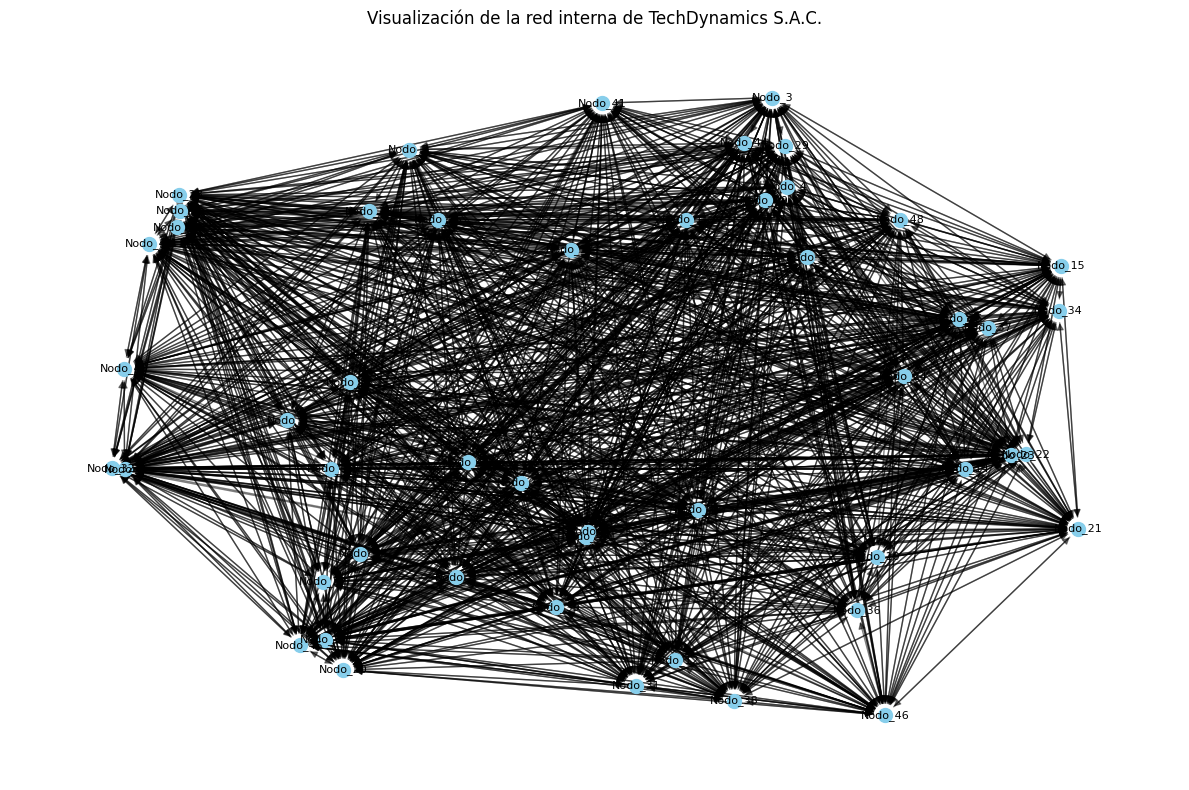

In [3]:
# Crear un grafo dirigido ponderado
G = nx.DiGraph()

# Agregar nodos y aristas con peso
for _, row in df.iterrows():
    G.add_edge(row['Origen'], row['Destino'], weight=row['Peso'])

# Tamaño de la figura
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # layout por fuerza de atracción

# Dibujar nodos y aristas
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Visualización de la red interna de TechDynamics S.A.C.")
plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Cálculo de métricas
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())
betweenness = nx.betweenness_centrality(G, weight='weight')
closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G, weight='weight')

# Crear un DataFrame resumen con las métricas
metrics_df = pd.DataFrame({
    'In-Degree': pd.Series(in_degree),
    'Out-Degree': pd.Series(out_degree),
    'Betweenness': pd.Series(betweenness),
    'Closeness': pd.Series(closeness),
    'PageRank': pd.Series(pagerank)
})

# Mostrar los 5 nodos más importantes por cada métrica
top_metrics = {
    'In-Degree': metrics_df['In-Degree'].sort_values(ascending=False).head(5),
    'Out-Degree': metrics_df['Out-Degree'].sort_values(ascending=False).head(5),
    'Betweenness': metrics_df['Betweenness'].sort_values(ascending=False).head(5),
    'Closeness': metrics_df['Closeness'].sort_values(ascending=False).head(5),
    'PageRank': metrics_df['PageRank'].sort_values(ascending=False).head(5),
}

top_metrics


{'In-Degree': Nodo_30    49
 Nodo_13    49
 Nodo_7     49
 Nodo_14    49
 Nodo_24    49
 Name: In-Degree, dtype: int64,
 'Out-Degree': Nodo_48    49
 Nodo_13    49
 Nodo_46    49
 Nodo_25    49
 Nodo_18    49
 Name: Out-Degree, dtype: int64,
 'Betweenness': Nodo_11    0.177509
 Nodo_16    0.158163
 Nodo_9     0.149022
 Nodo_50    0.128614
 Nodo_37    0.109269
 Name: Betweenness, dtype: float64,
 'Closeness': Nodo_30    1.0
 Nodo_13    1.0
 Nodo_7     1.0
 Nodo_14    1.0
 Nodo_24    1.0
 Name: Closeness, dtype: float64,
 'PageRank': Nodo_21    0.024587
 Nodo_24    0.022990
 Nodo_50    0.022525
 Nodo_26    0.022425
 Nodo_39    0.022005
 Name: PageRank, dtype: float64}